In [37]:
import torch
import os, glob
import numpy as np
from global_config import global_config
import cv2
from datetime import datetime
from tqdm.notebook import tqdm
import pandas as pd
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from utils.units import mm_dbz, dbz_mm
import datetime

In [2]:
files = sorted([file for file in glob.glob(global_config['DATA_PATH'])])

In [3]:
n = len(files)

In [4]:
data = []

In [5]:
hists = np.zeros((100, ))
times = []
means = []
for i in tqdm(range(0, n, 12)):
    data = np.fromfile(files[i], dtype=np.float32).reshape((3360, 2560))
    hist, bin_edges = np.histogram(data.reshape(-1), bins=100)
    data_mean = np.mean(data[data!=0])
    
    hists += hist
    times.append(os.path.basename(files[i])[:-4])
    means.append(data_mean)

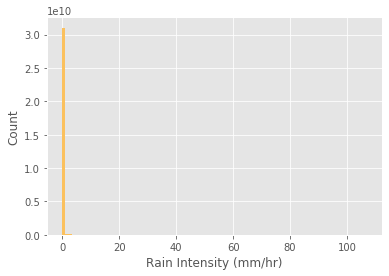

In [31]:
width = 1 * (bin_edges[1] - bin_edges[0])
center = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.bar(center, hists, align='center', width=width, color='#FBC15E')
plt.xlabel('Rain Intensity (mm/hr)')
plt.ylabel('Count')
plt.show()

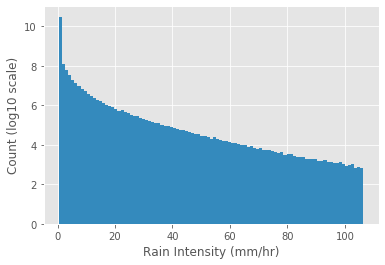

In [73]:
width = 1 * (bin_edges[1] - bin_edges[0])
center = (bin_edges[:-2] + bin_edges[2:]) / 2
plt.bar(center, np.log10(hists[:-1] + 1), align='center', width=width, color='#348ABD')
plt.xlabel('Rain Intensity (mm/hr)')
plt.ylabel('Count (log10 scale)')
plt.show()

In [22]:
df = pd.DataFrame({'time': times, 'means': means})

In [33]:
df.loc[:, 'time'] = pd.to_datetime(df['time'], format='%Y%m%d_%H%M')

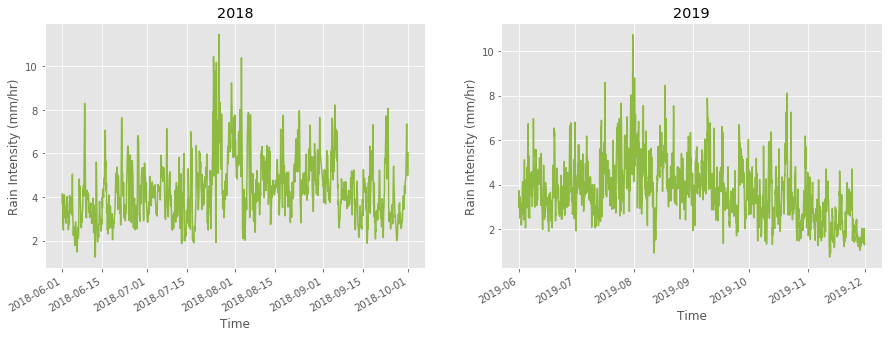

In [67]:
cut_date = datetime.datetime(2018, 12, 12)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
df[df['time'] <= cut_date].set_index('time').plot(ax=ax1, color='#8EBA42')
ax1.set_xlabel('Time')
ax1.set_ylabel('Rain Intensity (mm/hr)')
ax1.set_title('2018')
ax1.get_legend().remove()
df[df['time'] > cut_date].set_index('time').plot(ax=ax2, color='#8EBA42')
ax2.set_xlabel('Time')
ax2.set_ylabel('Rain Intensity (mm/hr)')
ax2.set_title('2019')
ax2.get_legend().remove()
plt.show()

In [76]:
files[0]

'/mnt/raid0/wni_dataset/201806/01/20180601_0000.bin'

In [77]:
files[int(n*0.6)]

'/mnt/raid0/wni_dataset/201908/01/20190801_1240.bin'